In [112]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random as rng

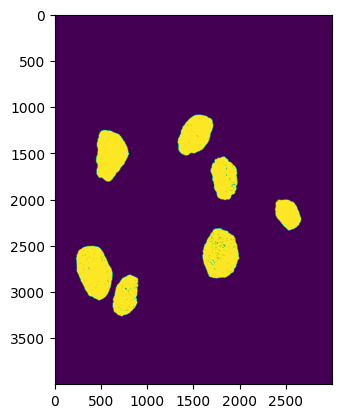

In [113]:
image = cv.imread("81.jpg")
original_image = cv.cvtColor(image, cv.COLOR_BGR2RGB) 
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY) 

_, dst = cv.threshold(image, 100, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
plt.imshow(dst)

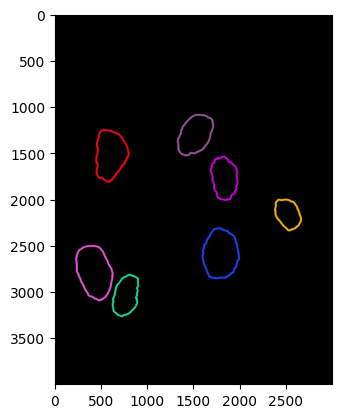

In [114]:
contours, hierarchy = cv.findContours(dst, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# ez számít a kép méretétől, és hogy ahoz képest kb mekkora mazsolákat láthatunk
# a lényege, hogy ne vegye figyelembe a kis szemcse / hiba részeket, amiknek nincs értelmük
contourThreshold = 100

highlighed_contours = []

drawing = np.zeros((dst.shape[0], dst.shape[1], 3), dtype=np.uint8)
for i in range(len(contours)):
    if len(contours[i]) > contourThreshold:
        highlighed_contours.append(contours[i])
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv.drawContours(drawing, contours, i, color, 20, cv.LINE_8, hierarchy, 0)
 

plt.imshow(drawing)

drawing_centers = drawing.copy()


In [117]:
centerpoints = []

for h_contour in highlighed_contours:
    # fura lett az a lista, ezért változtatni kell rajta
    h_contour = h_contour.reshape(h_contour.shape[0], h_contour.shape[2])

    # középpont 
    x_coordinates, y_coordinates = zip(*h_contour)
    center_x = sum(x_coordinates) / len(h_contour)
    center_y = sum(y_coordinates) / len(h_contour)

    centerpoints.append((int(center_x), int(center_y)))

    cv.circle(drawing_centers, (int(center_x), int(center_y)), 20, (255,0,0), -1)


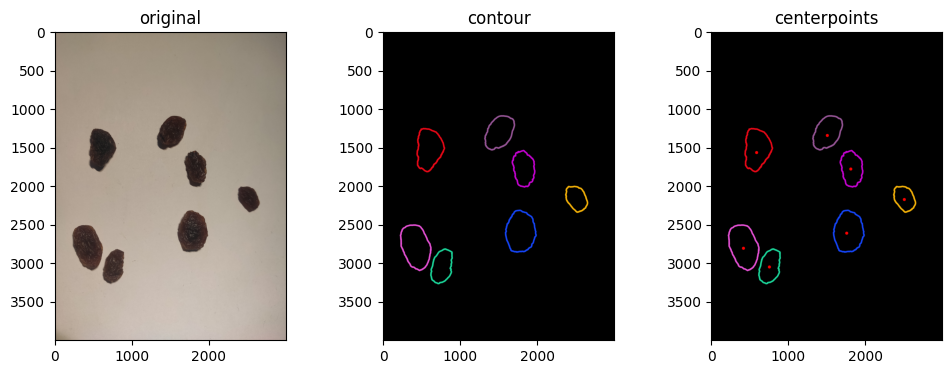

In [116]:
plt.figure(figsize=(12, 4))


plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('original')

plt.subplot(1, 3, 2)
plt.imshow(drawing)
plt.title('contour')

plt.subplot(1, 3, 3)
plt.imshow(drawing_centers)
plt.title('centerpoints')

plt.show()

In [121]:
x, y = centerpoints[0]
x

758